# 1.PROBLEM INFO

OBJECTIVE:-Our goal here is to understand the data as much as possible , comparing different models and create a briesf analysis about the titanic survival data

# 2.VARIABLE EXPLANATION

Passenger Id- Id number of passengers 

Name- Name of the passenger

Survival- Person survived or not ( 0 for No & 1 for Yes)

P-class- With what class of ticket that passenger was traveling.

sex- Male Or Female

Age- Age of the person 

Sibsp- Number of siblings/spouses on the Titanic

parch- Number of parents/children on the Titanic

Ticket- Ticket number

Fare- Amount of money that person paid to travel

Cabin- Cabin Number of Passenger

#  3.IMPORTING LIBRARIES

In [112]:
import pandas as pd  
import numpy as np    
import matplotlib.pyplot as plt 
import seaborn as sns   
import warnings  
from six.moves import urllib
import os
warnings.filterwarnings("ignore")

In [113]:
data_1=pd.read_csv('train2.csv')

# 4.DATA COLLECTION 


In [114]:
data_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
data_1.tail()  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [116]:
data_1.shape 

(891, 12)

TOTAL NO OF PASSENGERS ARE 891

In [117]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [118]:
data_1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [119]:
numeric_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

We have 5 categorical features : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [120]:
data_1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

THE AGE AND CABIN COLUMNS ARE HAVING 177 AND 687 EMPTY/NULL VALUES

In [121]:
data_1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


FOR 714 AGE ENTRIES THE AVERAGE MEAN IS 29.69 SO THE AVERAGE AGE GROUP OF THE PASSENGERS IS AROUND 29 AND 30


#  5.UNIVARITE ANALYSIS  ---                                                                                                 [we have total 12 columns but univarite analysis is only done on 8,rest 4 are left behind as they are having more number of unique values ]



here o represents not survived and 1 respresents survived

In [122]:
survived_count = data_1.groupby('Survived')['Survived'].count()
survived_count

Survived
0    549
1    342
Name: Survived, dtype: int64

In [123]:
male_female_count = data_1.groupby('Sex')['Sex'].count()
male_female_count

Sex
female    314
male      577
Name: Sex, dtype: int64

In [124]:
data_1['Sex'].value_counts(normalize=True)*100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

In [125]:
data_1.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

81 females out of 314 and 468 out of 577 males died

<AxesSubplot:xlabel='Sex', ylabel='count'>

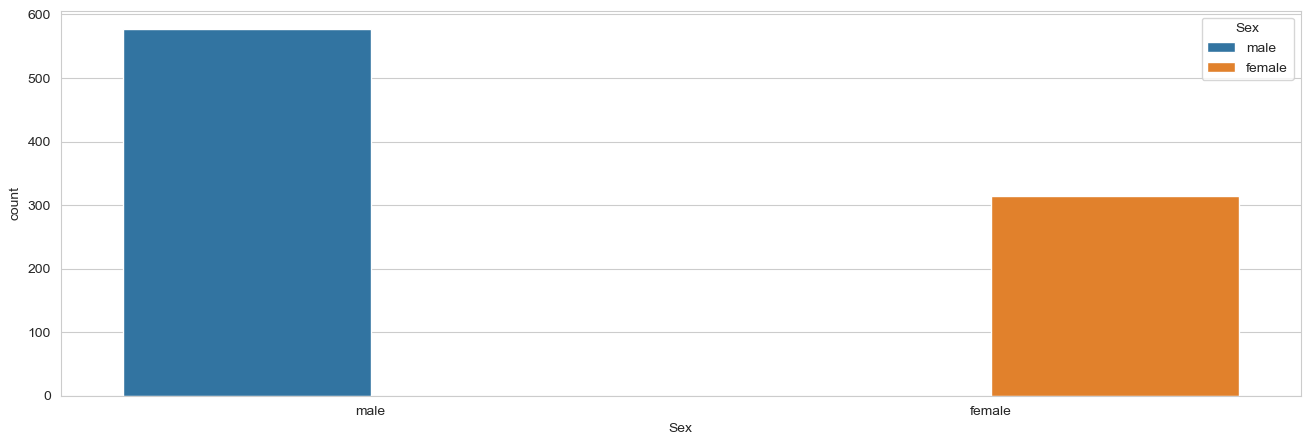

In [126]:
sns.countplot(data_1["Sex"],hue = data_1["Sex"],data = data)

In [127]:
travelling_class_count = data_1.groupby('Pclass')['Pclass'].count()
travelling_class_count

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

In [128]:
travelling_class_count = data_1.groupby('Embarked')['Embarked'].count()
travelling_class_count

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

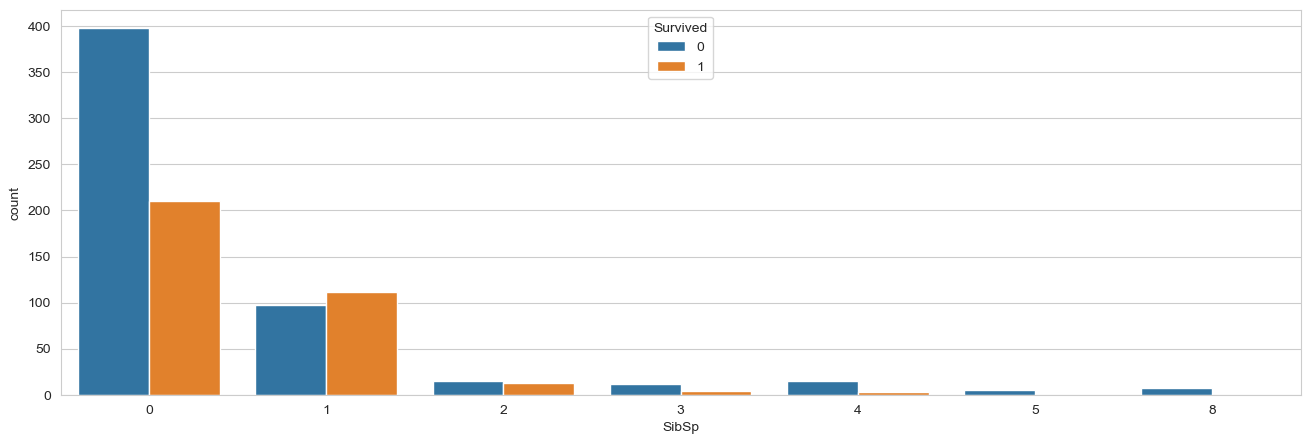

In [129]:
sns.countplot(data_1["SibSp"],hue = data_1["Survived"],data = data_1)

Passengers who have 0 siblings mostly of them died.

<AxesSubplot:xlabel='Parch', ylabel='count'>

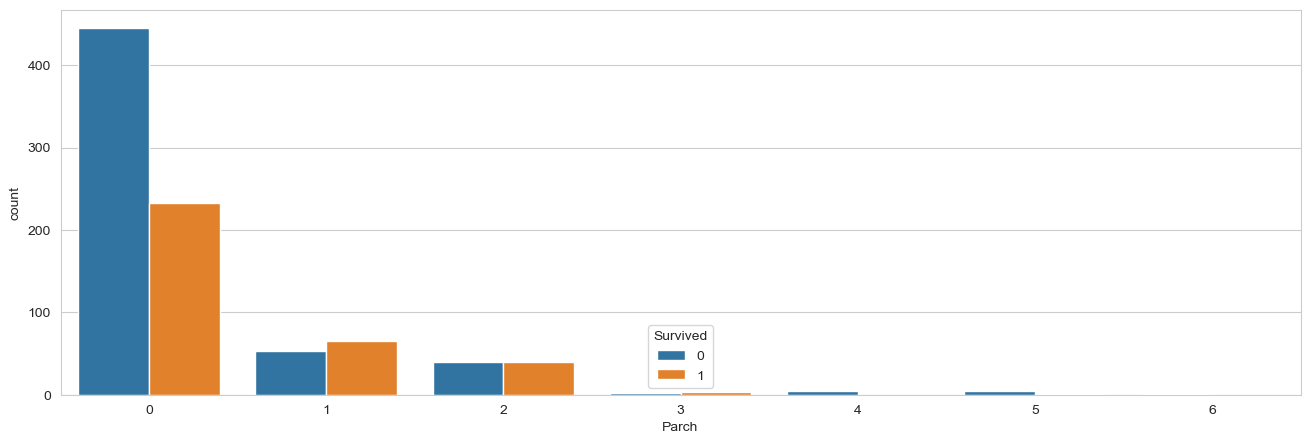

In [130]:
sns.countplot(data_1["Parch"],hue = data_1["Survived"],data = data_1)

In [131]:
Passengers who have no parents most of them died.

SyntaxError: invalid syntax (2501919243.py, line 1)

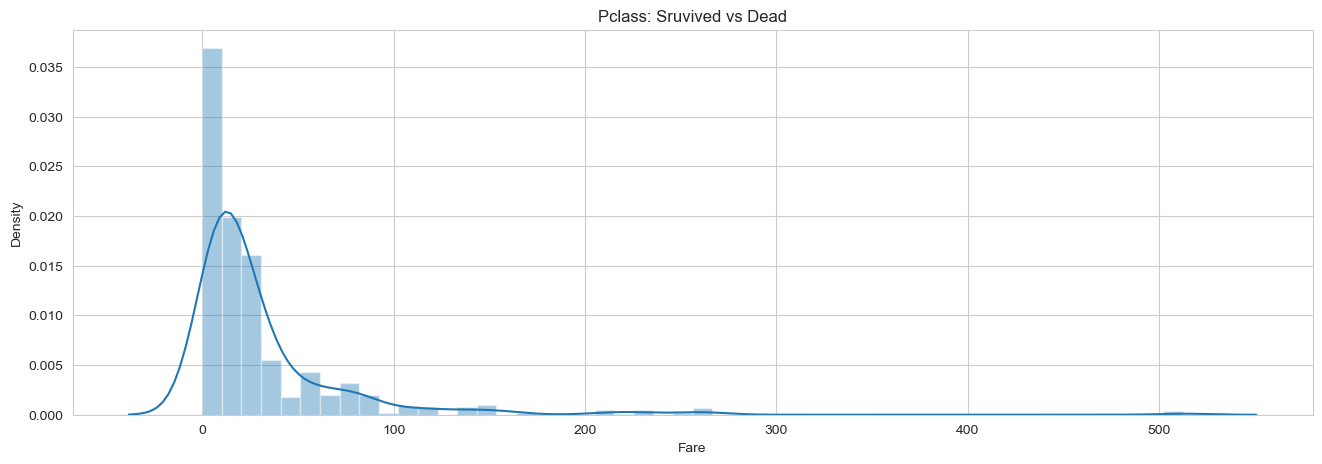

In [132]:
sns.distplot(data_1['Fare'])
plt.title('Pclass: Sruvived vs Dead')
plt.show()

Passengers who paid low fare have a higher chance to die and viceversa

<AxesSubplot:xlabel='Embarked', ylabel='count'>

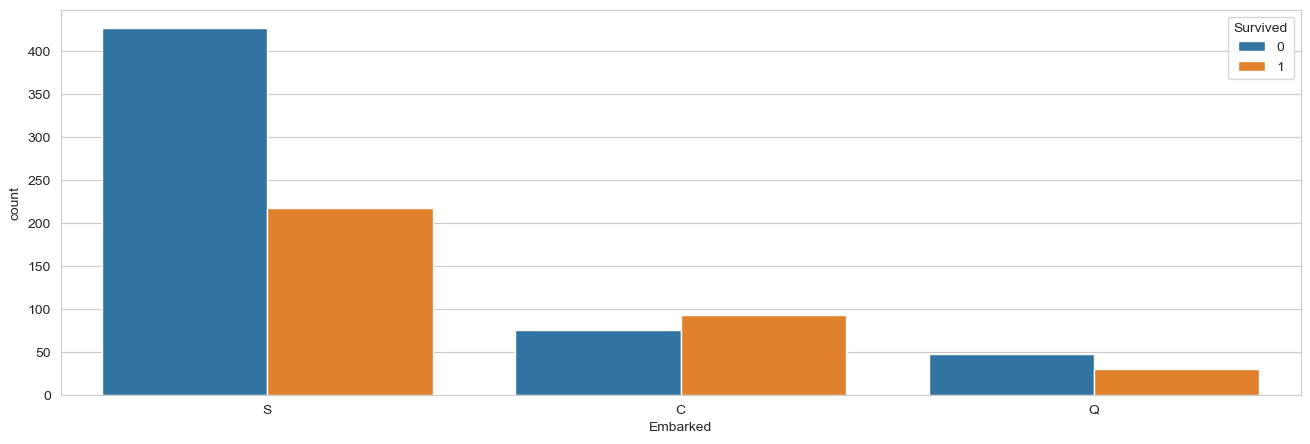

In [133]:
sns.countplot(data_1["Embarked"],hue = data_1["Survived"],data = data_1)

Passengers who started his journey from S most of them died.

# 6.BIVARITE ANALYSIS

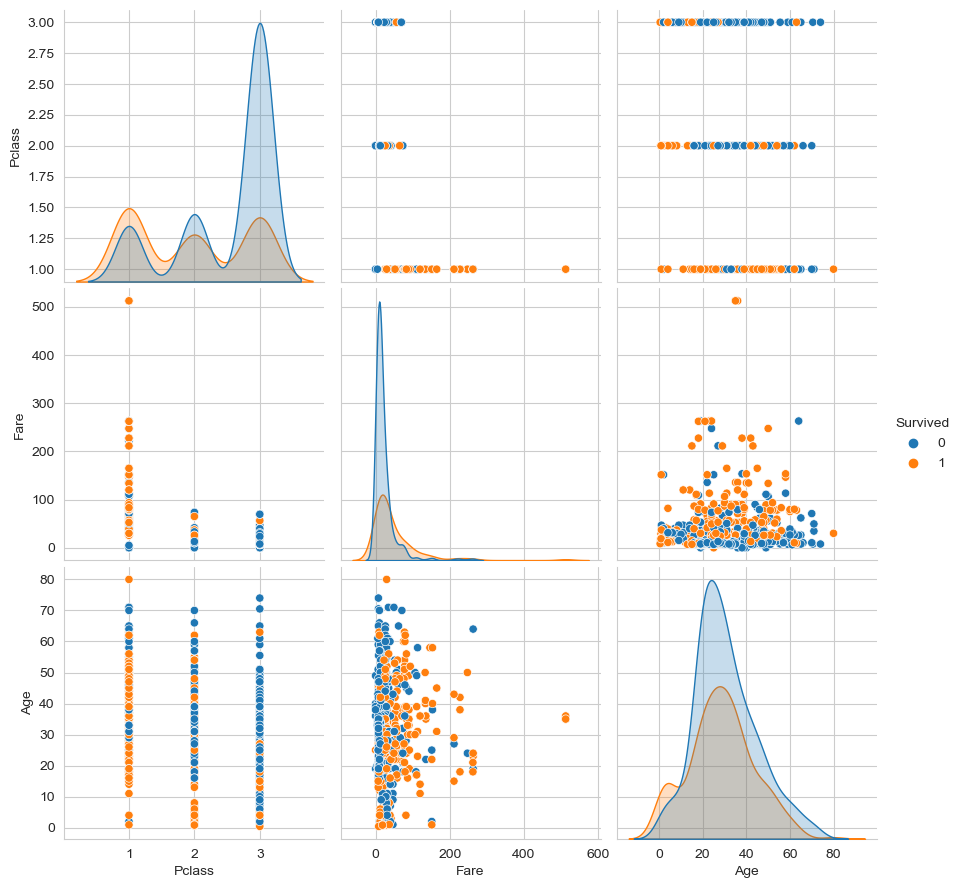

In [134]:
sns.set_style("whitegrid");
sns.pairplot(data_1[["Survived","Pclass","Fare","Age"]], hue="Survived", size=3);
plt.show()

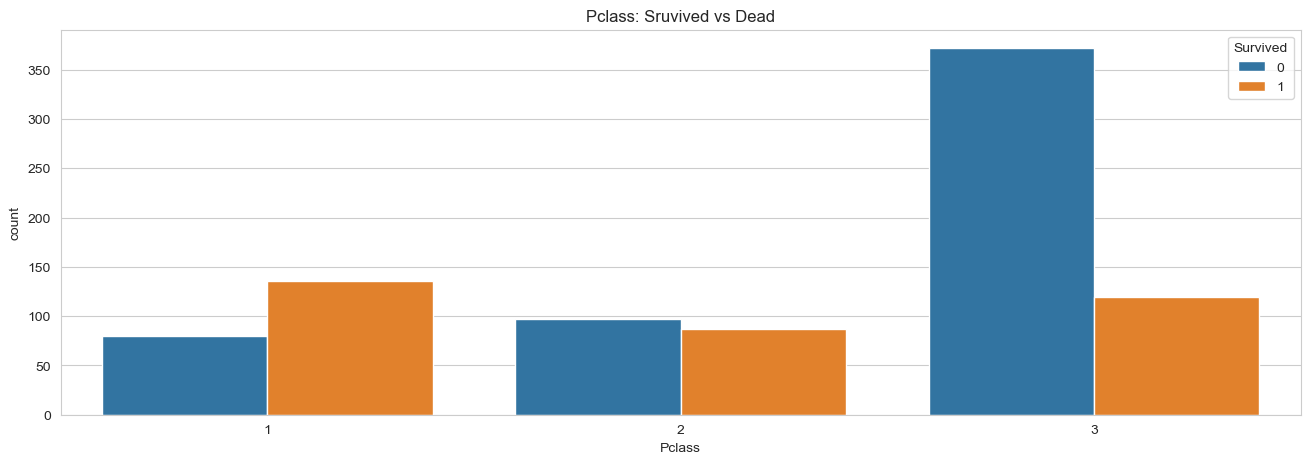

In [135]:
sns.countplot('Pclass', hue='Survived', data=data_1)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

in CLASS-1:there are more people saved(apprx 75% survived)
   CLASS-2:there survived and non survived rate is 49 and 50%
   CLASS-3:more people died ( apprx 25% survived)
   

In [99]:
print('Oldest person Survived was of:',data['Age'].max())
print('Youngest person Survived was of:',data['Age'].min())
print('Average person Survived was of:',data['Age'].mean())

Oldest person Survived was of: 80.0
Youngest person Survived was of: 0.42
Average person Survived was of: 29.69911764705882


# 7.SECOND DATA SET 

In [136]:
data_2=pd.read_csv('test.csv')

In [137]:
data_2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [103]:
data_2.tail()  

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [104]:
data_2.shape 

(418, 11)

In [105]:
data_2.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [106]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [108]:
data_2.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 8.UNIVARITE AND BIVARITE ANALYSIS IS NOT DONE AS BOTH DATA SETS ARE HAVING SAME COLUMN ENTRIES

#  9.MERGING BOTH DATA SETS

In [144]:
data_len = len(data_1)
data_1= pd.concat([data_1,data_2],axis = 0).reset_index(drop = True)

In [145]:
data_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [146]:
data_1.columns[data_1.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [147]:
data_1.isnull().sum()

PassengerId       0
Survived        836
Pclass            0
Name              0
Sex               0
Age             349
SibSp             0
Parch             0
Ticket            0
Fare              2
Cabin          1341
Embarked          2
dtype: int64

In [151]:
data_1[data_1["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [152]:
data_1["Embarked"] = data_1["Embarked"].fillna("C")
data_1[data_1["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [150]:
data_1[data_1["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S
1461,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [153]:
data_1["Fare"] = data_1["Fare"].fillna("C")
data_1[data_1["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


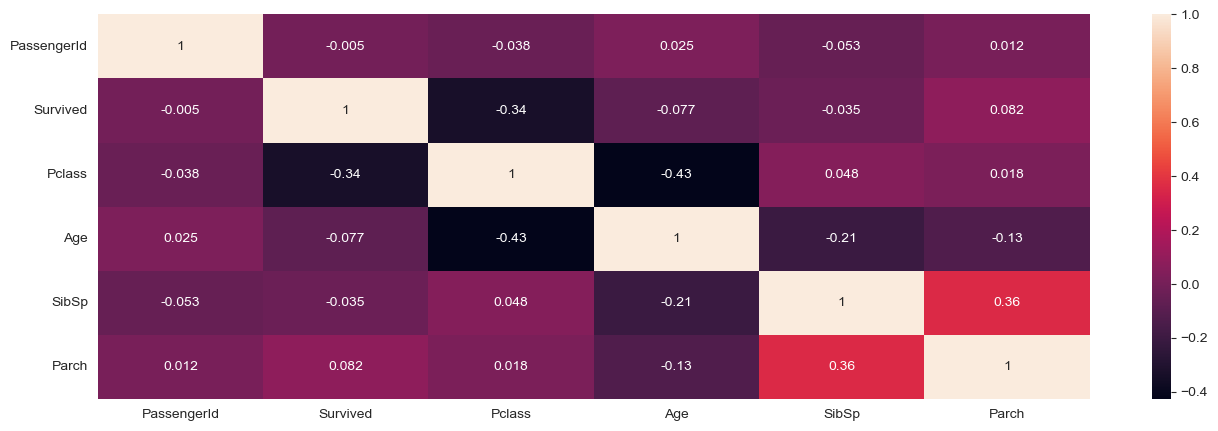

In [154]:
sns.heatmap(data_1.corr(),annot=True)
figsize=(15,20)
plt.xticks(rotation=0)
plt.show()